# Project Overview

- This notebook implements a movie recommender system. 
- Recommender systems are used to suggest movies or songs to users based on their interest or usage history.  
- For this project, I would like to explore Item-based Collaborative Filter 

<br>
<Strong> User-based Collaborative filter </Strong><br>
-> users taste change and more users than the products (complexity enhances)

<br>
<Strong>Item-base Collaborative filter</Strong><br> 
-> explore relationship between items / product features do not change over time. 

## 1. Data import

In [116]:
path = '/Users/margokim/Downloads/Project 8/'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
movie_titles_df = pd.read_csv(path + 'Movie_Id_Titles')

movie_titles_df.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [118]:
movies_rating_df = pd.read_csv(path+'u.data', sep ='\t', names =['user_id', 'item_id','rating', 'timestamp'])

In [119]:
movies_rating_df.head(10)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [120]:
#moive_rating and moive_titles df can be joined by item_id index

In [121]:
movies_rating_df.drop(['timestamp'], axis = 1, inplace =True)

In [122]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [123]:
movies_rating_df = pd.merge(movies_rating_df, movie_titles_df, on = 'item_id')

movies_rating_df.head(10)

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
5,274,50,5,Star Wars (1977)
6,227,50,4,Star Wars (1977)
7,99,50,5,Star Wars (1977)
8,305,50,5,Star Wars (1977)
9,108,50,4,Star Wars (1977)


## 2.EDA

In [124]:
movies_rating_df.groupby('title')['rating'].describe()

#1664 movie data and each movie rating's statistic 5 number summary

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [125]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']
# Extracting mean column

In [126]:
ratings_df_mean

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

In [127]:
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']
#how many times users reviewed
ratings_df_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [128]:
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis =1 )
ratings_mean_count_df.reset_index()

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


<AxesSubplot:ylabel='Frequency'>

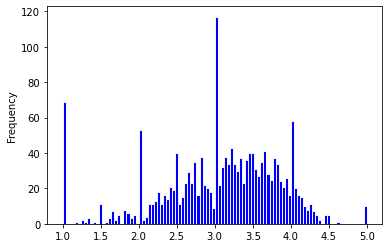

In [129]:
ratings_mean_count_df['mean'].plot(bins = 100, kind ='hist', color ='b', edgecolor = 'whitesmoke')

#reviews 5.0 and 1.0 are unlikely to happen, need to analyze whether there is an outlier for those values 

<AxesSubplot:ylabel='Frequency'>

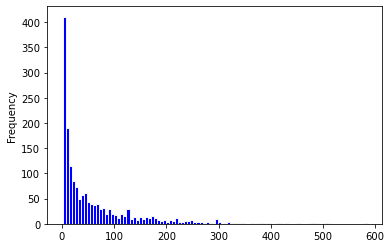

In [130]:
ratings_mean_count_df['count'].plot(bins = 100, kind ='hist', color ='b', edgecolor = 'whitesmoke')
#distribution of rating occurance - Most movies were reviewed less than 30

In [131]:
ratings_mean_count_df[ ratings_mean_count_df['mean'] == 5]

#Checking for rating 5.0 movies --> counts are low 

,count,mean
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


In [132]:
ratings_mean_count_df.sort_values('count', ascending = False).head(10)

,count,mean
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
"English Patient, The (1996)",481.0,3.656965
Scream (1996),478.0,3.441423
Toy Story (1995),452.0,3.878319
Air Force One (1997),431.0,3.631090


In [133]:
ratings_mean_count_df.sort_values('count', ascending = True).head(10)

,count,mean
title,,
Á köldum klaka (Cold Fever) (1994),1.0,3.0
Mille bolle blu (1993),1.0,1.0
Mat' i syn (1997),1.0,1.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
"Man from Down Under, The (1943)",1.0,1.0
Mamma Roma (1962),1.0,4.0
Mad Dog Time (1996),1.0,3.0
"Big Bang Theory, The (1994)",1.0,4.0
MURDER and murder (1996),1.0,2.0


In [134]:
ratings_mean_count_df.describe()

,count,mean
count,1664.000000,1664.000000
mean,60.097957,3.077010
std,80.963482,0.780411
min,1.000000,1.000000
25%,7.000000,2.665094
50%,27.000000,3.162132
75%,80.250000,3.651808
max,584.000000,5.000000


In [135]:
#As count varies by movies and influences rating highly, 

In [136]:
userid_movietitle_matrix = movies_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [137]:
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Checking for movie item correlation with other movies (single)

In [138]:
starwars = userid_movietitle_matrix['Star Wars (1977)']
starwars.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [139]:
starwars_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(starwars), columns =['Correlation'])

starwars_correlations = starwars_correlations.join(ratings_mean_count_df['count'])

starwars_correlations

/Users/margokim/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/margokim/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
...,...,...
Young Guns II (1990),0.228615,44.0
"Young Poisoner's Handbook, The (1995)",-0.007374,41.0
Zeus and Roxanne (1997),0.818182,6.0


In [140]:
starwars_correlations.dropna(inplace = True)
starwars_correlations

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
...,...,...
Young Guns (1988),0.186377,101.0
Young Guns II (1990),0.228615,44.0
"Young Poisoner's Handbook, The (1995)",-0.007374,41.0


In [141]:
starwars_correlations.sort_values('Correlation', ascending = False)

#Correlation seems high but count is insignificant to conclude the correlation

,Correlation,count
title,,
Hollow Reed (1996),1.0,6.0
Stripes (1981),1.0,5.0
"Beans of Egypt, Maine, The (1994)",1.0,2.0
Safe Passage (1994),1.0,2.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5.0
...,...,...
For Ever Mozart (1996),-1.0,3.0
Frankie Starlight (1995),-1.0,4.0
I Like It Like That (1994),-1.0,3.0


In [142]:
# Checking correlation without outliers
starwars_correlations[starwars_correlations['count'] > 80].sort_values('Correlation', ascending = False).head(10)

,Correlation,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0
"Sting, The (1973)",0.367538,241.0
Indiana Jones and the Last Crusade (1989),0.350107,331.0
Pinocchio (1940),0.347868,101.0
"Frighteners, The (1996)",0.332729,115.0


## 4.Checking for movie item correlation with other movies (All)

In [143]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson' , min_periods = 80)

#min of 80 counts handled by min_periods / As witnessed above, review counts is an outlier to our review rating

In [144]:
movie_correlations['Star Wars (1977)'].dropna().sort_values(ascending = False).head(10)
#Data Validation with above single movie item correlation values

title
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.748353
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Sting, The (1973)                                     0.367538
Indiana Jones and the Last Crusade (1989)             0.350107
Pinocchio (1940)                                      0.347868
Frighteners, The (1996)                               0.332729
L.A. Confidential (1997)                              0.319065
Name: Star Wars (1977), dtype: float64

In [156]:
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Conclusion 

<Strong>Recommendation system based on my ratings submission to the system</Strong>

In [146]:
# Recommendation system based on my ratings

myRatings = pd.read_csv(path + 'My_Ratings.csv')

In [147]:
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),2
1,Star Wars (1977),5
2,Contact (1997),4
3,Return of the Jedi (1983),4
4,Scream (1996),3
5,"English Patient, The (1996)",2


In [148]:
similar_movies_list = pd.Series()

for i in range(0,2):
    similar_movie = movie_correlations[ myRatings['Movie Name'][i] ].dropna()
    similar_movie = similar_movie.map(lambda x: x* myRatings ['Ratings'][i])
    similar_movies_list = similar_movies_list.append(similar_movie)

/var/folders/qv/b315g44s20xbflxhcr30rytc0000gn/T/ipykernel_13534/415600702.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  similar_movies_list = pd.Series()
/var/folders/qv/b315g44s20xbflxhcr30rytc0000gn/T/ipykernel_13534/415600702.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies_list = similar_movies_list.append(similar_movie)
/var/folders/qv/b315g44s20xbflxhcr30rytc0000gn/T/ipykernel_13534/415600702.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies_list = similar_movies_list.append(similar_movie)


In [149]:
similar_movies_list.sort_values (inplace = True, ascending = False)
print(similar_movies_list.head(10))

Star Wars (1977)                                      5.000000
Empire Strikes Back, The (1980)                       3.741763
Return of the Jedi (1983)                             3.362779
Raiders of the Lost Ark (1981)                        2.680586
Liar Liar (1997)                                      2.000000
Austin Powers: International Man of Mystery (1997)    1.887164
Sting, The (1973)                                     1.837692
Indiana Jones and the Last Crusade (1989)             1.750535
Pinocchio (1940)                                      1.739338
Frighteners, The (1996)                               1.663647
dtype: float64
